# PERKENALAN

Name: Fathur Rachman

Batch : 003 - FTDS

# IMPORT LIBRARY

In [1]:
# Basic Import:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for report
#from pandas_profiling import ProfileReport 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# UPLOAD DATASET

In [2]:
data = pd.read_csv('Life_expectancy_dataset.csv')
data.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


In [3]:
data.tail()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa
222,223,Chad,50.2,49.0,51.3,Africa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


In [5]:
data.shape

(223, 6)

# DATA CLEANING

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,223.0,112.000000,64.518731,1.0,56.50,112.0,167.50,223.0
Overall Life,223.0,72.487892,8.459335,50.2,67.45,74.9,78.60,89.5
Male Life,223.0,70.041704,8.074942,48.6,64.50,72.2,75.85,85.6
Female Life,223.0,75.019283,8.986633,51.0,69.75,77.9,81.60,93.5


In [7]:
#mengecek missing value

data.isnull().sum()

Rank            0
Country         0
Overall Life    0
Male Life       0
Female Life     0
Continent       0
dtype: int64

In [8]:
#mengecek duplikat pada dataset

data.duplicated().sum()

0

#### Membuat Kolom Rasio dan Perbedaan Umur Antara Pria dan Wanita 

In [9]:
#buat kolom baru

data['Ratio'] = data['Male Life']/data['Female Life']
data['Difference'] = - data['Male Life'] + data['Female Life']

In [10]:
data.columns

Index(['Rank', 'Country', 'Overall Life', 'Male Life', 'Female Life',
       'Continent', 'Ratio', 'Difference'],
      dtype='object')

In [11]:
#split data kategori dan numerik

num_data = data[['Overall Life','Male Life','Female Life','Ratio','Difference']]
cat_data = data[['Rank','Continent']]

# Eksplorasi Data

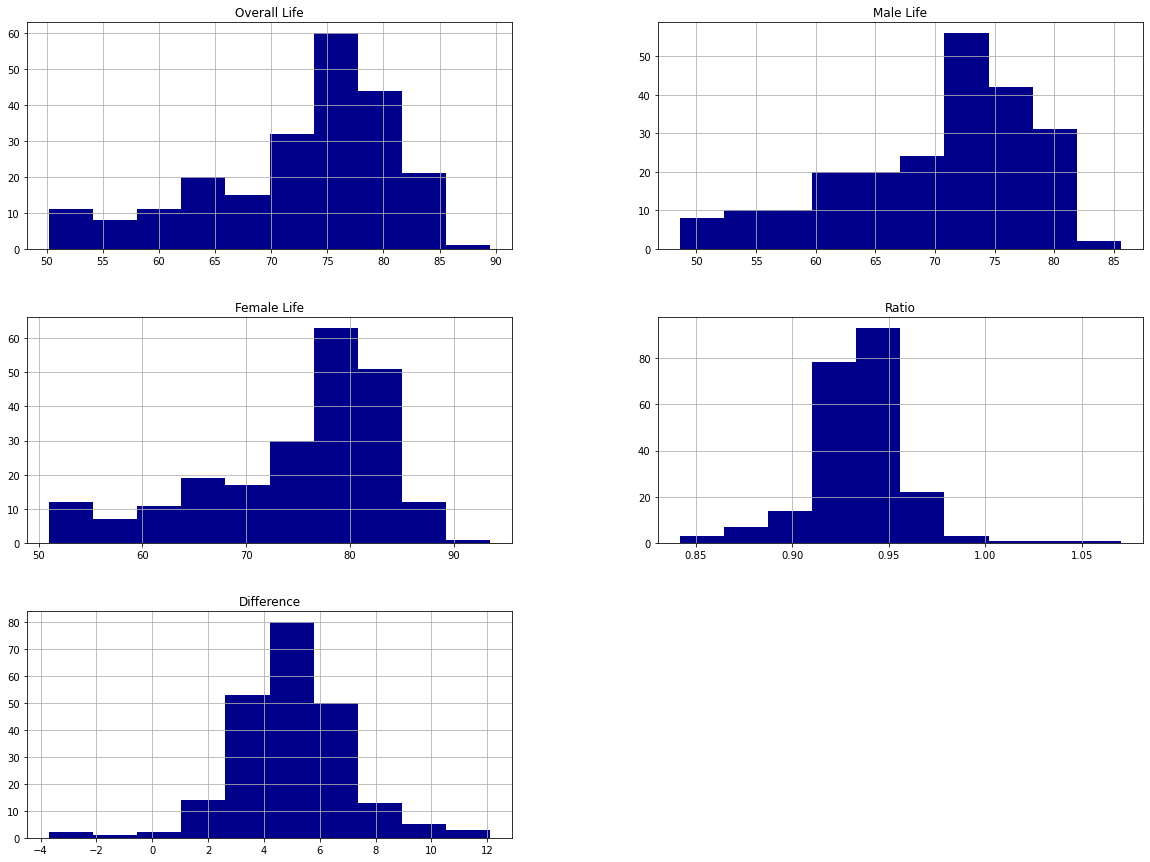

In [12]:
#distribusi data numerik

fig = plt.figure(figsize=(20,15))
ax = fig.gca();
num_data.hist(ax=ax, color='#00008B')
plt.show()

Berdasarkan persebaran data usia di seluruh dunia, secara umum overall age (wanita dan pria) memiliki paling banyak di usia 75 tahun. Begitupun dengan usia hidup pria dan wanita. Namun, terjadi sedikit perbedaan pada usia hidup wanita yang sedikit lebih kecil dibandingkan dengan umur hidup pria.

In [13]:
data.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent,Ratio,Difference
0,1,Monaco,89.5,85.6,93.5,Europe,0.915508,7.9
1,2,Japan,85.0,81.7,88.5,Asia,0.923164,6.8
2,3,Singapore,85.0,82.3,87.8,Asia,0.937358,5.5
3,4,Macau; China,84.5,81.6,87.6,Asia,0.931507,6.0
4,5,San Marino,83.3,80.7,86.1,Europe,0.937282,5.4


##### Ratio & Difference

In [14]:
ratio = data.sort_values(by='Ratio')
ratio.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent,Ratio,Difference
155,156,Russia,70.3,64.3,76.4,Asia,0.841623,12.1
137,138,Belarus,72.7,67.2,78.6,Europe,0.854962,11.4
111,112,Lithuania,74.9,69.5,80.6,Europe,0.862283,11.1
150,151,Kazakhstan,70.8,65.6,75.7,Asia,0.866579,10.1
147,148,Ukraine,71.8,67.1,76.9,Europe,0.872562,9.8


In [15]:
ratio.tail()

,Rank,Country,Overall Life,Male Life,Female Life,Continent,Ratio,Difference
153,154,Nepal,70.7,70.1,71.3,Asia,0.983170,1.2
214,215,Lesotho,53.0,52.9,53.1,Africa,0.996234,0.2
219,220,Swaziland,51.6,52.2,51.0,Africa,1.023529,-1.2
121,122,Montserrat,74.4,75.8,72.9,North America,1.039781,-2.9
211,212,Botswana,54.5,56.3,52.6,Africa,1.070342,-3.7


Dalam kolom terlihat bahwa semakin nilai ratio mendekati 1, maka umur pria akan lebih besar dibandingkan dengan umur wanita. Ratio paling besar terjadi di negara kontinen Asia dan Eropa, dimana rata-rata umur pria dan wanita memiliki perbedaan yang sangat jauh hingga 10 kali. Berbeda dengan negara di kontinen Afrika yang masa hidup prianya lebih besar dibandingkan dengan wanita.

In [16]:
#report_data = ProfileReport(data.sample(100))
#report_data

Setelah melakukan perhitungan dengan profiling Report, didapatkan hasil yang lebih masuk akal. Semua variabel memiliki korelasi antar satu sama lain.

# Data Preprocessing

## Scaling data numerik

In [17]:
#scaling data numerik

scaler = StandardScaler()

#fit and transform
num_fnt = scaler.fit_transform(num_data)

## PCA

pengurangan dimensi digunakan setelah kita melihat ada atau tidak adanya korelasi antar kolom. Berdasarkan dari Profiling Report, didapatkan bahwa semua kolom memiliki korelasi yang tinggi.

Tujuan penggunakan PCA adalah untuk mendapatkan dimensi terbaik namun dapat mewakili 99% dari data.

In [18]:
num_data.shape

(223, 5)

In [19]:
#Pendefinisian PCA

pca1 = PCA(n_components=5)
pca1.fit(num_data)

PCA(n_components=5)

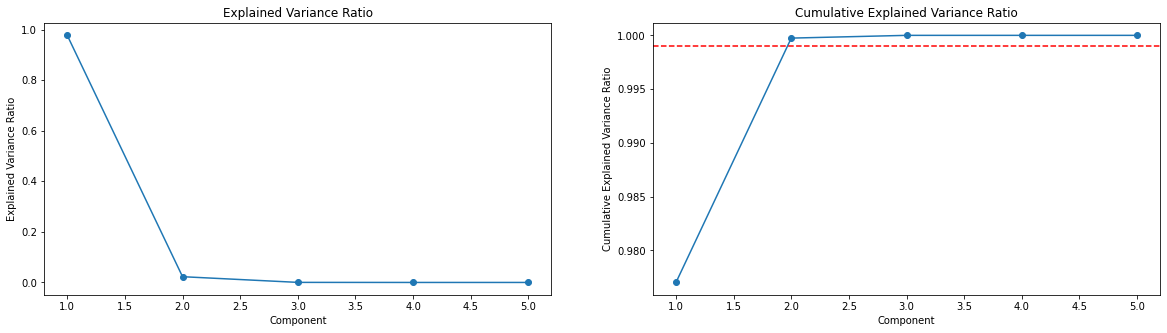

In [20]:
#mencari rasio variance terbak yang dijelaskan oleh kumulatif

fig,ax = plt.subplots(ncols=2, figsize=(20,5))

ax[0].plot(range(1,6), pca1.explained_variance_ratio_ ,marker='o')
ax[0].set_xlabel('Component')
ax[0].set_ylabel('Explained Variance Ratio')
ax[0].set_title("Explained Variance Ratio")

ax[1].plot(range(1,6), np.cumsum(pca1.explained_variance_ratio_), marker='o')
ax[1].axhline(y = 0.999, color = 'r', linestyle = 'dashed') 
ax[1].set_xlabel('Component')
ax[1].set_ylabel('Cumulative Explained Variance Ratio')
ax[1].set_title("Cumulative Explained Variance Ratio")
plt.show()

Dapat terlihat dari hasil uji explained variance ratio dan cumulative explained variance ratio didapatkan bahwa nilai yang lebih baik untuk PCA n_components adalah 2.

In [21]:
#PCA 2 dimensi

pca2 = PCA(n_components=1)
X_train = pca2.fit_transform(num_fnt)

# PELATIHAN MODEL

## KMeans Clustering 

### Mencari Cluster Optimal

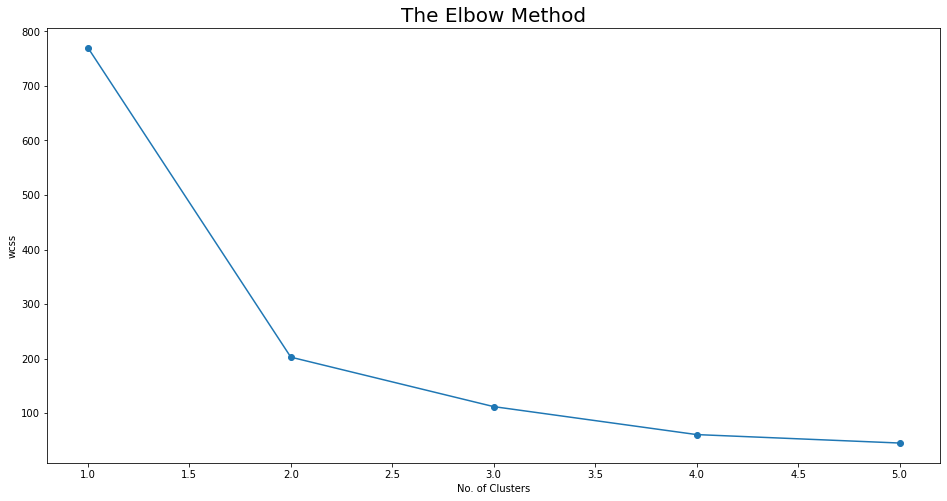

In [22]:
wcss = []

for i in range(1, 6):
  km = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
  km.fit(X_train)
  wcss.append(km.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(1, 6), wcss, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

Berdasarkan hasil dari perhitungan elbow method, didapatkan hasil terbaik penggunaan kluster adalah 2

In [23]:
km2 = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=100)
km2.fit(X_train)

KMeans(n_clusters=2, random_state=100)

## DBScan

In [24]:
#cari poin terdekat dari setiap data yang ada

neighbors = NearestNeighbors(n_neighbors=2)
neighbors.fit(X_train)

NearestNeighbors(n_neighbors=2)

In [25]:
#Define distance and indices
distance, indices = neighbors.kneighbors(X_train)

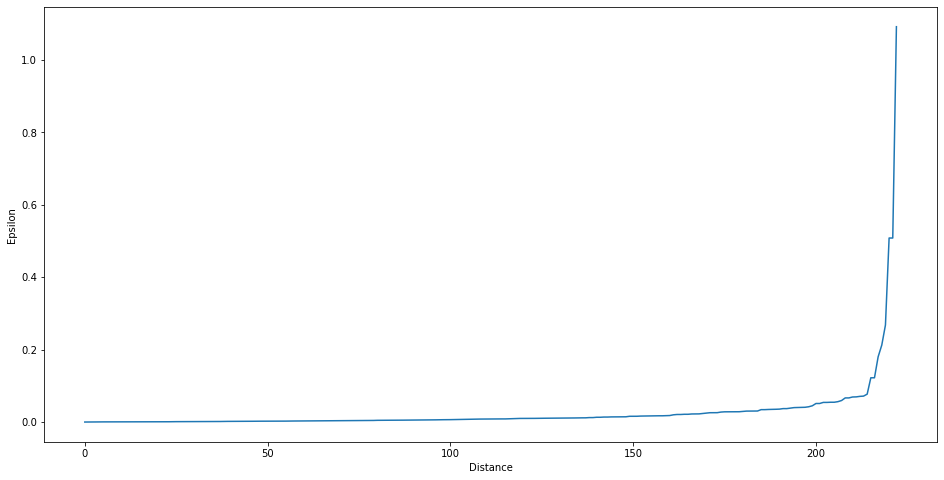

In [26]:
distances = np.sort(distance, axis = 0)

plt.figure(figsize=(16,8))
plt.plot(distances[:,1])
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.show()

Setelah dilihat dari grafik diatas, diambil nilai epsilon kurang lebih senilai 0.5. Karena nilai epsilon tersebut terletak pada lekukan garis di K-Distance Graph

In [27]:
#Define Model DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)

In [28]:
#Fit Model DBSCAN
dbscan.fit(X_train)

DBSCAN(min_samples=2)

# EVALUASI MODEL

Pada Evaluasi Model kali ini akan membandingkan hasil klustering antara Model K-Means serta Agglomerative Clustering menggunakan PCA2D.

### PCA 2D

In [32]:
#PCA Mode 2 D
pca_2d = PCA(n_components=2)

num_2d = pca_2d.fit_transform(num_fnt)
num_2d

array([[-3.80336813e+00,  3.61541181e-01],
       [-2.71144180e+00,  4.29362160e-01],
       [-2.29422452e+00,  1.16479260e+00],
       [-2.37394161e+00,  8.24103980e-01],
       [-1.97967049e+00,  1.02568590e+00],
       [-1.60738465e+00,  1.56987782e+00],
       [-1.94946920e+00,  9.24810115e-01],
       [-1.59992482e+00,  1.48453680e+00],
       [-1.63032181e+00,  1.34497353e+00],
       [-1.88181027e+00,  8.77257301e-01],
       [-1.31072270e+00,  1.85152810e+00],
       [-2.18549880e+00,  2.87626556e-01],
       [-1.70827864e+00,  1.07717624e+00],
       [-1.66456030e+00,  1.12783029e+00],
       [-1.79344503e+00,  8.95283775e-01],
       [-1.28609539e+00,  1.75486827e+00],
       [-1.73177052e+00,  8.51022262e-01],
       [-1.64043474e+00,  1.03004013e+00],
       [-1.59783608e+00,  1.16354528e+00],
       [-2.04751026e+00,  2.67463255e-01],
       [-1.29962563e+00,  1.60330871e+00],
       [-1.96650199e+00,  3.71062462e-01],
       [-1.67506631e+00,  8.12011353e-01],
       [-1.

### KMeans

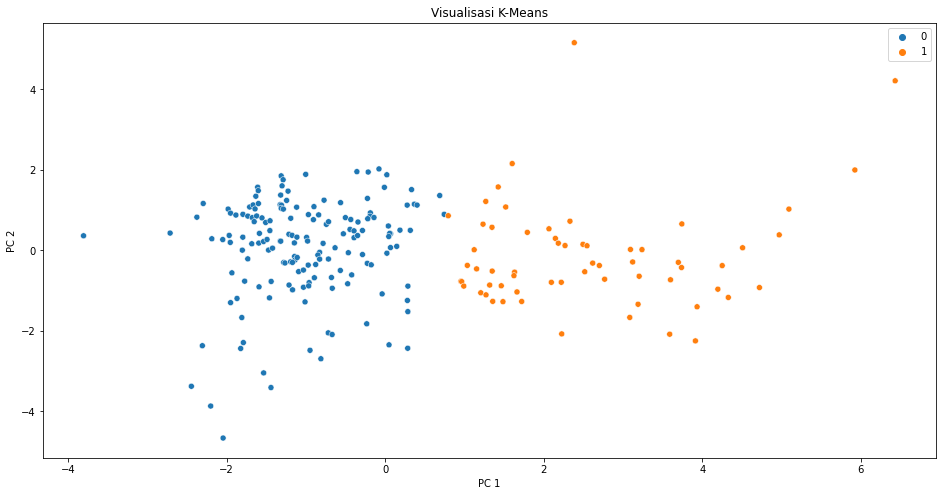

In [33]:
#Visualisasi K-Means
y_km_2d = km2.predict(X_train)

fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(x = num_2d[:,0], y = num_2d[:,1], hue=y_km_2d)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Visualisasi K-Means')
plt.show()

Dari perspektif 2D, kita bisa melihat di K-Means Model, dataset dibagi menjadi 2 cluster. Batas setiap cluster cukup renggang dan antara cluster 0 dan cluster 1 tidak saling menindih satu sama lain.

### DBScan

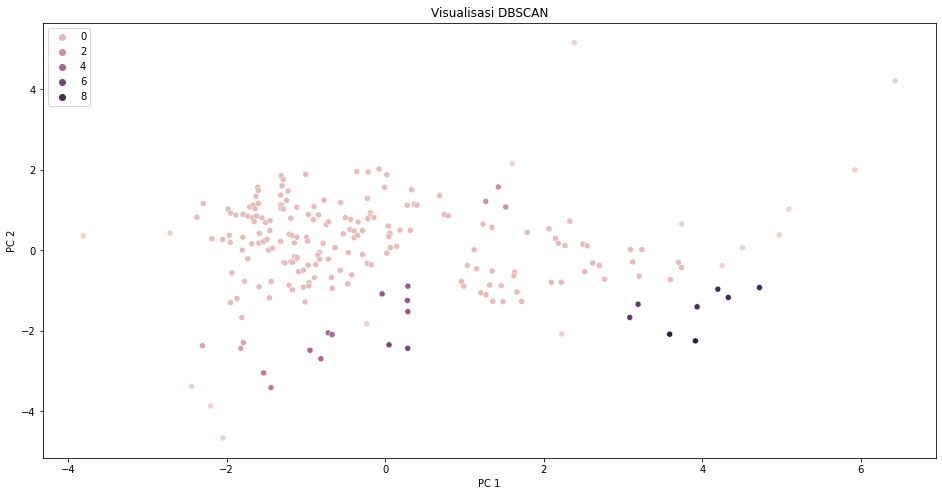

In [34]:
y_dbscan_2d = dbscan.fit_predict(num_2d)

fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(x = num_2d[:,0], y = num_2d[:,1], hue=y_dbscan_2d)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Visualisasi DBSCAN')
plt.show()

Sementara untuk hasil visualisasi DBSCAN, terlihat cluster didominasi oleh warna terang atau 0 dengan nilai cluster lainnya menyebar dan tidak berkelompok.

Sehingga dapat disimpulkan bahwa model terbaik untuk Dataset ini adalah model K-Means.

# MODEL INFERENCE

In [35]:
#Sample Data
random_sample = num_data.sample(n=4, random_state=42)
random_sample

,Overall Life,Male Life,Female Life,Ratio,Difference
9,82.5,79.9,85.4,0.935597,5.5
84,76.5,74.4,78.8,0.944162,4.4
117,74.6,71.4,78.3,0.911877,6.9
144,72.3,70.3,74.4,0.944892,4.1


In [36]:
#Transform Data
random_transform = scaler.transform(random_sample)

In [37]:
#X Sample
X_sample = pca2.transform(random_transform)

In [38]:
#Predict using K-Means
y_sample = km2.predict(X_sample)
y_sample

array([0, 0, 0, 0])

Keempat data sample tersebut masuk kedalam cluster 0, 0, 0, dan 0.

# Kesimpulan

Kesimpulan dari penelitian diatas adalah;

1. EDA
- Dataset yang digunakan sangat bersih untuk digunakan.
- Dataset tidak memiliki missing value dan duplicated.
- Kolom antar dataset memiliki korelasi yang kuat antar satu sama lain sehingga data tidak ada yang di drop.
- Karena tidak ada yang di drop, maka semua kolom digunakan untuk pengujian PCA KMeans dan seterusnya.

2. Model Analisa
- Berdasarkan penerapan PCA Kumulatif Explained Var Ratio, n components digunakan sebesar 1 karena memiliki nilai toleransi sebesar 99%
- Berdasarkan hasil perbandingan KMeans dan DBScan, model yang lebih baik adalah KMeans dikarenakan persebaran data dan klusternya lebih baik dibandingkan dengan DBScan.

- Catatan: untuk melihat hasil Profiling Report, silahkan hapus # terlebih dulu dan jalankan secara manual, bukan run all. Karena jika run all grafik seperti EDA, PCA, KMeans, dan lainnya tidak muncul. Terima kasih.